# Feature Matching

---

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
reeses = cv2.imread('Data/reeses_puffs.png',0)     

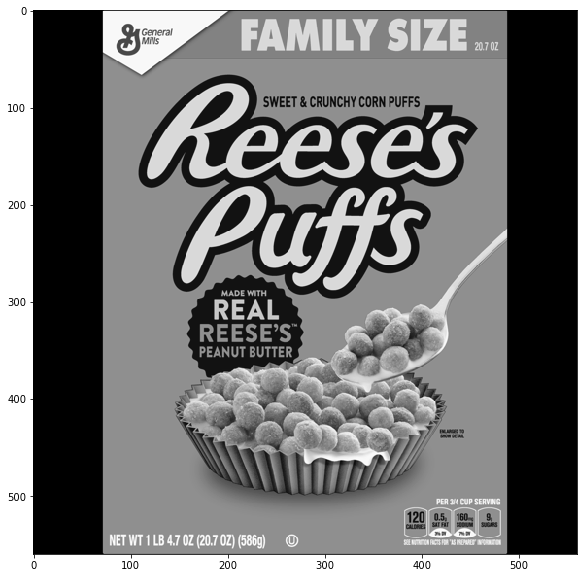

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('Data/many_cereals.jpg',0) 

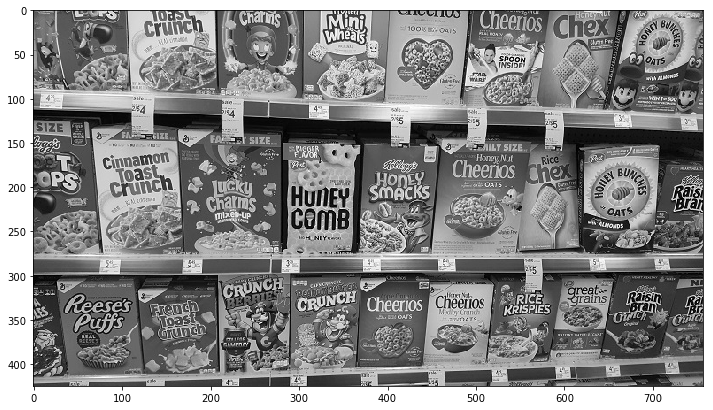

In [6]:
display(cereals)

--------
# Brute Force Detection with ORB Descriptors

In [7]:
# ORB detector oluştur
orb = cv2.ORB_create()

# ORB ile keypointleri bul
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

# BFMatcher object oluştur
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Tanımlayıcılara match uygula
matches = bf.match(des1,des2)

# Mesafelere göre sınıflandır
matches = sorted(matches, key = lambda x:x.distance)

# İlk 25 eşleniği çiz
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

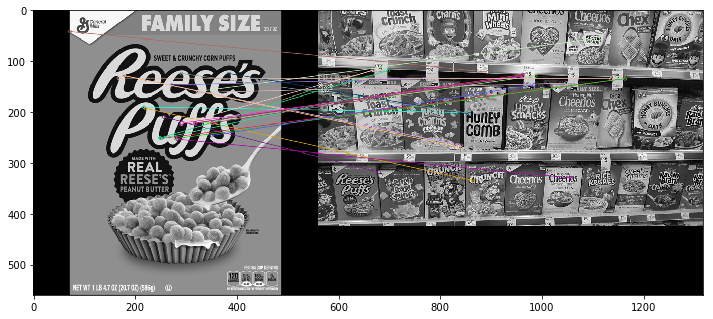

In [8]:
display(reeses_matches)

### Brute-Force Matching ile SIFT Descriptors ve Ratio Test
---

In [9]:
# SIFT object oluştur
sift = cv2.xfeatures2d.SIFT_create()

# SIFT key points ve descriptorları tanımla
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# BFMatcher ekle
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Ratio test ekle
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn 
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

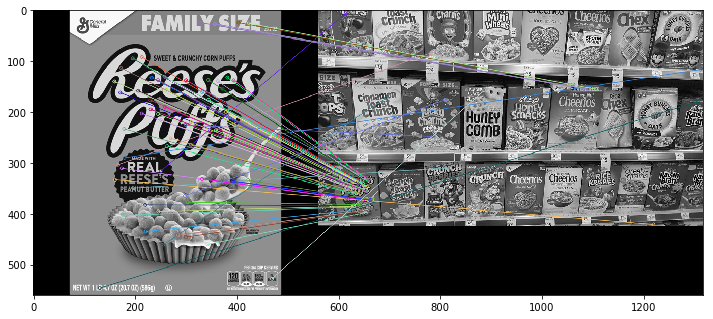

In [10]:
display(sift_matches)

### FLANN based Matcher
---

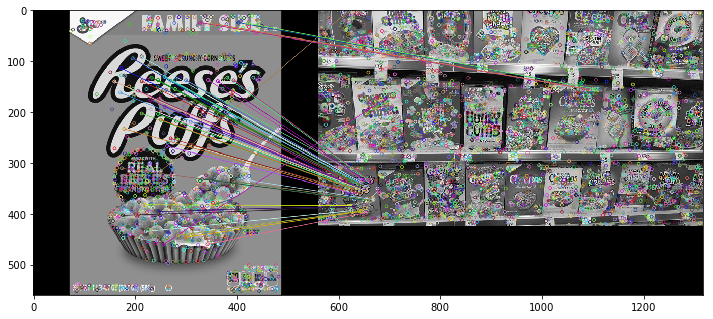

In [11]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)

display(flann_matches)

In [12]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

matchesMask = [[0,0] for i in range(len(matches))]

for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

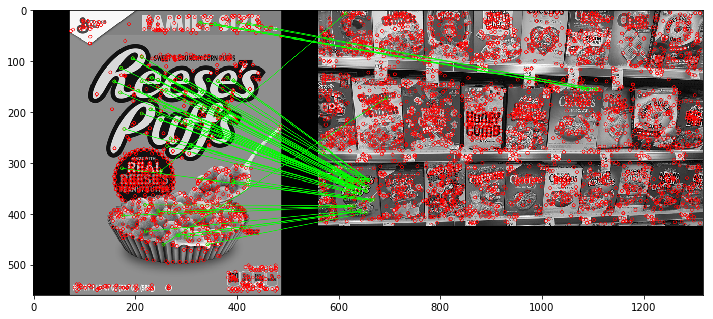

In [13]:
display(flann_matches)